#**Traffic Accident Severity Prediction Using Machine Learning Models**


---



## Loading Dataset And Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
accidents = pd.read_csv(r'C:\Users\KIIT\Desktop\Ukaccident2005-2015/Accidents0515.csv', error_bad_lines=False,warn_bad_lines=False)
casualties=pd.read_csv(r'C:\Users\KIIT\Desktop\Ukaccident2005-2015/Casualties0515.csv' , error_bad_lines=False,warn_bad_lines=False)
vehicles=pd.read_csv(r'C:\Users\KIIT\Desktop\Ukaccident2005-2015/Vehicles0515.csv', error_bad_lines=False,warn_bad_lines=False)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print(accidents.shape)
accidents.head()

(1780653, 32)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863


In [ ]:
print(casualties.shape)
casualties.head()

(2216720, 15)


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [ ]:
print(vehicles.shape)
vehicles.head()

(3004425, 22)


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,0,1,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,0,4,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,0,4,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,0,3,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,0,1,1,15,2,49,8,1769,1,4,2,1


In [ ]:
for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])

In [ ]:
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

In [ ]:
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']

In [ ]:
a = []
for i in range(len(accidents)):
    a.append(pd.to_datetime(accidents['Date_time'].values[i]))

In [ ]:
accidents['Date_time'] = a

In [ ]:
accidents.drop(columns=['Date','Time'],inplace=True)

##**Data Visualization**


---



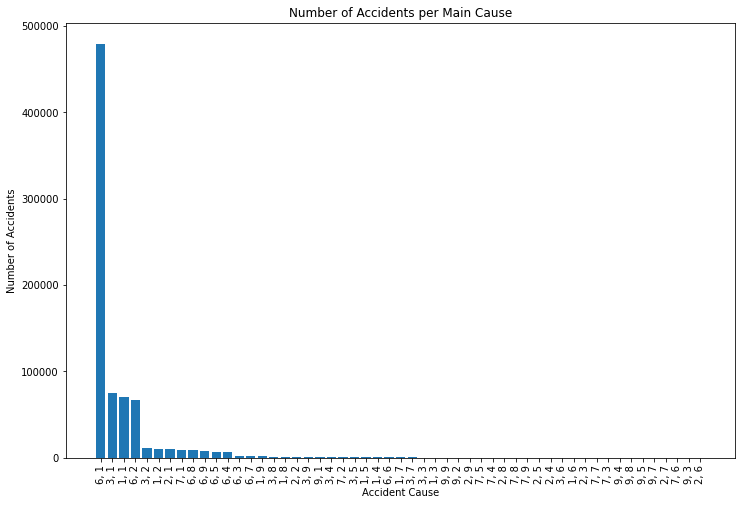

In [ ]:
# Merge the casualties and vehicles dataframes into the accidents dataframe
accidents = accidents.merge(casualties, on='Accident_Index').merge(vehicles, on='Accident_Index')

accidents['Road_Type'] = accidents['Road_Type'].astype(str)
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype(str)

# Create a new column for the main accident cause
accidents['Accident Cause'] = accidents['Road_Type'] + ', ' + accidents['Weather_Conditions']

# Create a pivot table showing the count of accidents for each 'Accident Cause' category
accident_cause_counts = accidents.pivot_table(index='Weather_Conditions', columns='Road_Type', values='Accident_Index', aggfunc='count')

# Create a bar chart of the count of accidents per 'Accident Cause' category
accident_cause_counts = accidents['Accident Cause'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(x=accident_cause_counts.index, height=accident_cause_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Accident Cause')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Main Cause')
plt.show()


### Time of day or day of the week: 
Accidents may occur more frequently during certain times of the day or days of the week due to factors such as increased traffic or driver fatigue.

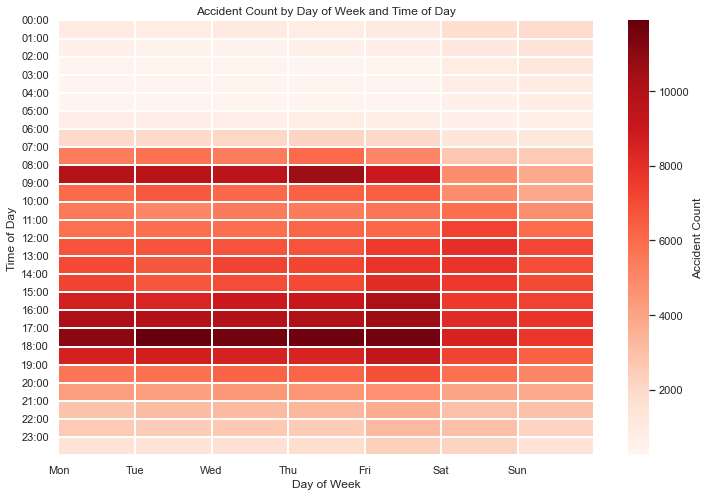

In [ ]:
accidents['DayOfWeek'] = accidents['Date_time'].dt.dayofweek
accidents['Hour'] = accidents['Date_time'].dt.hour

# Create a pivot table of the accident count for each day of the week and time of day
accidents_by_day_hour = accidents.pivot_table(values='Accident_Index', index='Hour', columns='DayOfWeek', aggfunc='count')

# Set the day and hour labels
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
hour_labels = [f'{hour:02d}:00' for hour in range(24)]

# Create the heatmap using seaborn
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(accidents_by_day_hour, cmap='Reds', linewidths=0.1, cbar_kws={'label': 'Accident Count'})
plt.xlabel('Day of Week')
plt.ylabel('Time of Day')
plt.xticks(range(7), day_labels)
plt.yticks(range(24), hour_labels)
plt.title('Accident Count by Day of Week and Time of Day')
plt.show()

So from the above visualization we can clearly see, accidents are more frequent on weekdays and are major during the morning hours(07:00-09:00) and evening hours(15:00-19:00).

### Type of vehicle involved: 

Accidents involving certain types of vehicles (e.g. motorcycles, heavy goods 
vehicles) may have different causes compared to accidents involving passenger cars.

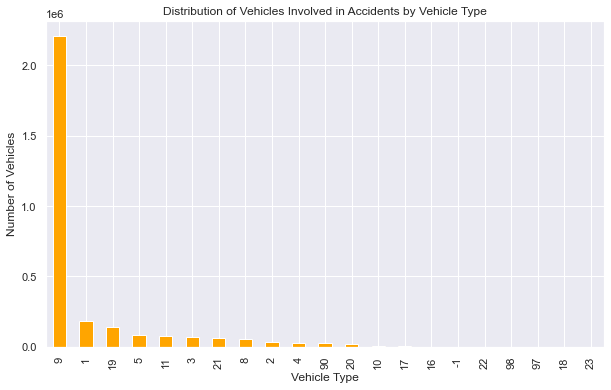

In [ ]:
# Count the number of vehicles by type
vehicle_type_counts = vehicles['Vehicle_Type'].value_counts()

# Plot the bar chart
vehicle_type_counts.plot(kind='bar', figsize=(10,6), color='orange')
plt.title('Distribution of Vehicles Involved in Accidents by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.show()

So majorly, 'Car' is involved the most and the least accidents happen with 'Tram'.

### Road conditions

Accidents may be more likely to occur on certain types of roads or in certain weather conditions.


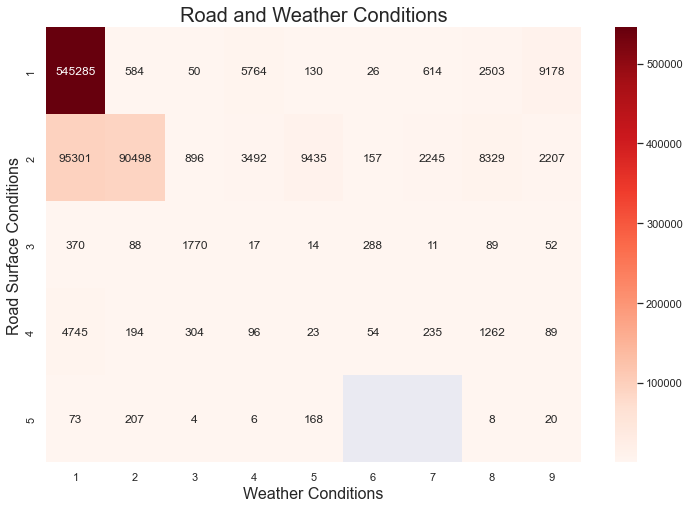

In [ ]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(12, 8))

data = accidents.groupby(['Road_Surface_Conditions', 'Weather_Conditions']).size().reset_index(name='count')
heatmap_data = data.pivot(index='Road_Surface_Conditions', columns='Weather_Conditions', values='count')

sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='g', ax=ax)

ax.set_title('Road and Weather Conditions', fontsize=20)
ax.set_xlabel('Weather Conditions', fontsize=16)
ax.set_ylabel('Road Surface Conditions', fontsize=16)

plt.show()


Here we can clearly visualise the accidents are happening more where "Road Surface condition"==1 which is Wet and "Weather Conditions"==1 which is fine with no high winds.

### Scatter plot of latitude and longitude of accident locations

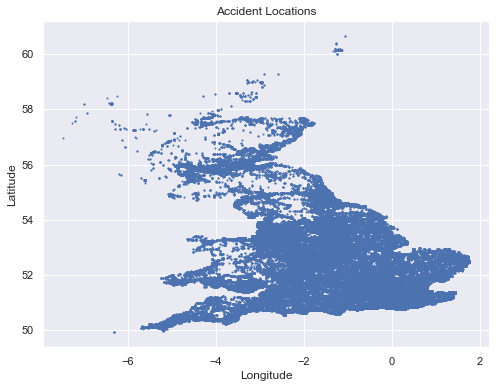

In [ ]:
# Create a scatter plot of latitude and longitude
plt.figure(figsize=(8,6))
plt.scatter(accidents['Longitude'], accidents['Latitude'], s=1, c='b')
plt.title('Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

From the scatter plot of latitude and longitude of accident locations, we can observe that accidents are more frequent in certain regions, such as the southern part of England.

###Number of Vehicles and Casualties as per Accident Severity

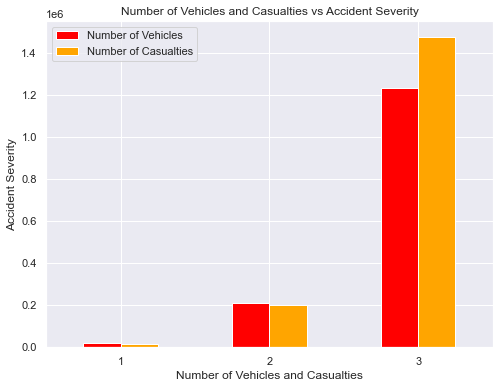

In [ ]:
# Create a pivot table to calculate the sum of number of vehicles and casualties for each accident severity level
severity_pivot = pd.pivot_table(accidents, values=['Number_of_Vehicles', 'Number_of_Casualties'], index=['Accident_Severity'], aggfunc='sum')

# Plot the bar chart
ax = severity_pivot.plot(kind='bar', rot=0, figsize=(8,6), color=['red', 'orange', 'green'])
ax.set_xlabel("Number of Vehicles and Casualties")
ax.set_ylabel("Accident Severity")
ax.legend(["Number of Vehicles", "Number of Casualties"])
ax.set_title("Number of Vehicles and Casualties vs Accident Severity")
plt.show()


Based on the graph, it seems like there is a positive correlation between the number of vehicles and casualties and the accident severity level. As the severity level increases, the number of vehicles and casualties also tend to increase. This indicates that more serious accidents tend to involve more vehicles and result in more casualties.

However, it is important to note that correlation does not necessarily imply causation, and other factors could be at play in causing more severe accidents.

###Pivot table for Road type, Weather Conditions, Light conditions on basis of Speed limit, Number of casualities and vehicles based on Accident Severity 

In [ ]:
corr_pivot

Number_of_Casualties  \
Accident_Severity                                                            1   
Road_Type Weather_Conditions Light_Conditions Speed_limit                        
1         1                  1                20                           2.0   
                                              30                         283.0   
                                              40                          31.0   
                                              50                           4.0   
                                              60                          19.0   
...                                                                        ...   
9         9                  6                30                           NaN   
                             7                20                           NaN   
                                              30                           NaN   
                                              40                           NaN   
                                              60                           NaN   

                                                                            \
Accident_Severity                                               2        3   
Road_Type Weather_Conditions Light_Conditions Speed_limit                    
1         1                  1                20             43.0    465.0   
                                              30           3717.0  46003.0   
                                              40           1263.0  12856.0   
                                              50            356.0   5164.0   
                                              60           1223.0  10263.0   
...                                                           ...      ...   
9         9                  6                30              NaN      3.0   
                             7                20              NaN      2.0   
                                              30              NaN     27.0   
                                              40              NaN      6.0   
                                              60              NaN     16.0   

                                                          Number_of_Vehicles  \
Accident_Severity                                                          1   
Road_Type Weather_Conditions Light_Conditions Speed_limit                      
1         1                  1                20                         4.0   
                                              30                       203.0   
                                              40                        73.0   
                                              50                         2.0   
                                              60                        29.0   
...                                                                      ...   
9         9                  6                30                         NaN   
                             7                20                         NaN   
                                              30                         NaN   
                                              40                         NaN   
                                              60                         NaN   

                                                                            
Accident_Severity                                               2        3  
Road_Type Weather_Conditions Light_Conditions Speed_limit                   
1         1                  1                20             81.0    657.0  
                                              30           5278.0  62147.0  
                                              40           1556.0  16882.0  
                                              50            502.0   5786.0  
                                              60           1433.0  12586.0  
...                                                           ...      ...  
9 

###Correlation Matrix / Heatmap  of Accident Factors

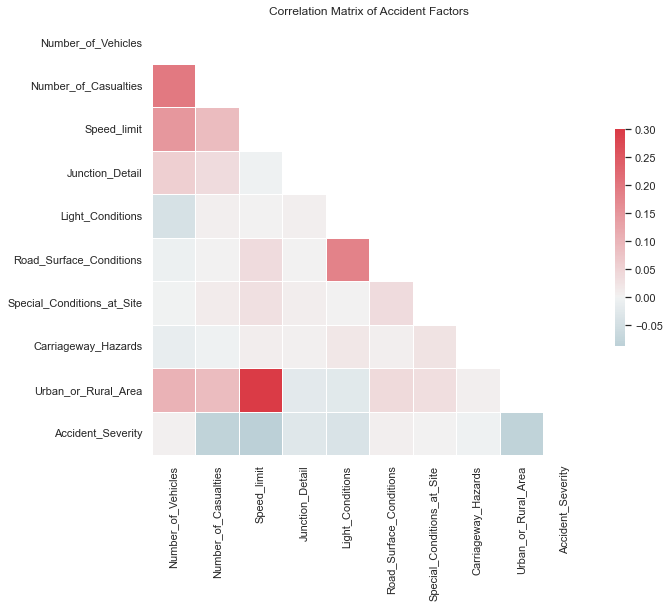

In [ ]:
# Create a subset of the dataframe with the columns of interest
data = accidents[['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit', 'Road_Type', 'Junction_Detail', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Accident_Severity']]

# Calculate the correlation matrix
corr = data.corr()

# Plot the correlation matrix
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix of Accident Factors")
plt.show()


The above heatmap that shows the correlation coefficients between the different factors and the number of accidents. Positive coefficients indicate a positive correlation, while negative coefficients indicate a negative correlation. The strength of the correlation is indicated by the color of the cell, with darker colors indicating stronger correlations.

##Data Prep and Cleaning

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

accidents = pd.read_csv(r'C:\Users\KIIT\Desktop\Ukaccident2005-2015/Accidents0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
casualties=pd.read_csv(r'C:\Users\KIIT\Desktop\Ukaccident2005-2015/Casualties0515.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
vehicles=pd.read_csv(r'C:\Users\KIIT\Desktop\Ukaccident2005-2015/Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [ ]:
# Drop unnecessary columns
vehicles.drop(['Vehicle_Reference', 'Driver_IMD_Decile', 'Junction_Location', 'Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?', 'Engine_Capacity_(CC)', 'Propulsion_Code'], axis=1, inplace=True)

# Convert categorical variables into numerical ones
vehicles['Vehicle_Type'] = pd.to_numeric(vehicles['Vehicle_Type'], errors='coerce')
vehicles['Towing_and_Articulation'] = pd.to_numeric(vehicles['Towing_and_Articulation'], errors='coerce')
vehicles['Vehicle_Manoeuvre'] = pd.to_numeric(vehicles['Vehicle_Manoeuvre'], errors='coerce')
vehicles['Sex_of_Driver'] = pd.to_numeric(vehicles['Sex_of_Driver'], errors='coerce')
vehicles['Age_Band_of_Driver'] = pd.to_numeric(vehicles['Age_Band_of_Driver'], errors='coerce')
vehicles['Age_of_Vehicle'] = pd.to_numeric(vehicles['Age_of_Vehicle'], errors='coerce')
vehicles['Driver_Home_Area_Type'] = pd.to_numeric(vehicles['Driver_Home_Area_Type'], errors='coerce')

# Replace missing values with the column mean
vehicles.fillna(vehicles.mean(), inplace=True)

# Print the first five rows of the cleaned dataset
vehicles.head()


,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,
200501BS00001,9,0,18,0,15,2,74,10,-1,1
200501BS00002,11,0,4,0,1,1,42,7,3,-1
200501BS00003,11,0,17,0,1,1,35,6,5,1
200501BS00003,9,0,2,0,15,1,62,9,6,1
200501BS00004,9,0,18,0,15,2,49,8,4,1


In [ ]:
casualties.drop(['Casualty_Reference', 'Casualty_Class', 'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger'], axis=1, inplace=True)

# Convert categorical variables into numerical ones
casualties['Sex_of_Casualty'] = pd.to_numeric(casualties['Sex_of_Casualty'], errors='coerce')
casualties['Age_Band_of_Casualty'] = pd.to_numeric(casualties['Age_Band_of_Casualty'], errors='coerce')
casualties['Casualty_Type'] = pd.to_numeric(casualties['Casualty_Type'], errors='coerce')

# Replace missing values with the column mean
casualties.fillna(casualties.mean(), inplace=True)

# Print the first five rows of the cleaned dataset
casualties.head()

,Vehicle_Reference,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,
200501BS00001,1,1,37,7,0,-1,0,1
200501BS00002,1,1,37,7,4,-1,11,1
200501BS00003,2,1,62,9,0,-1,9,1
200501BS00004,1,1,30,6,0,-1,0,1
200501BS00005,1,1,49,8,0,-1,3,-1


In [ ]:
# Merge the accidents, vehicles, and casualty datasets into a single dataframe
merged_data = pd.merge(accidents, vehicles, on='Accident_Index')
merged_data = pd.merge(merged_data, casualties, on='Accident_Index')

# Print the first five rows of the merged dataset
merged_data.head()


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Age_of_Vehicle,Driver_Home_Area_Type,Vehicle_Reference,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,-1,1,1,1,37,7,0,-1,0,1
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,3,-1,1,1,37,7,4,-1,11,1
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,5,1,2,1,62,9,0,-1,9,1
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,6,1,2,1,62,9,0,-1,9,1
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,4,1,1,1,30,6,0,-1,0,1


In [ ]:
merged_data.shape

(4287593, 49)

In [ ]:
merged_data.isnull().sum()

Location_Easting_OSGR                             256
Location_Northing_OSGR                            256
Longitude                                         256
Latitude                                          256
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              264
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                     0
Junction_Control            

In [ ]:
merged_data.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude','LSOA_of_Accident_Location','Time'],inplace=True)

In [ ]:
merged_data.isnull().sum()

Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditi

In [ ]:
merged_data.dtypes

Police_Force                                    int64
Accident_Severity                               int64
Number_of_Vehicles                              int64
Number_of_Casualties                            int64
Date                                           object
Day_of_Week                                     int64
Local_Authority_(District)                      int64
Local_Authority_(Highway)                      object
1st_Road_Class                                  int64
1st_Road_Number                                 int64
Road_Type                                       int64
Speed_limit                                     int64
Junction_Detail                                 int64
Junction_Control                                int64
2nd_Road_Class                                  int64
2nd_Road_Number                                 int64
Pedestrian_Crossing-Human_Control               int64
Pedestrian_Crossing-Physical_Facilities         int64
Light_Conditions            

In [ ]:
# Get summary statistics of numerical columns
summary = merged_data.describe(include='all')
summary

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,...,Age_of_Vehicle,Driver_Home_Area_Type,Vehicle_Reference,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
count,4.287593e+06,4.287593e+06,4.287593e+06,4.287593e+06,4287593,4.287593e+06,4.287593e+06,4287593,4.287593e+06,4.287593e+06,...,4.287593e+06,4.287593e+06,4.287593e+06,4.287593e+06,4.287593e+06,4.287593e+06,4.287593e+06,4.287593e+06,4.287593e+06,4.287593e+06
unique,NaN,NaN,NaN,NaN,3652,NaN,NaN,207,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,05/09/2013,NaN,NaN,E10000016,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,5823,NaN,NaN,125781,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.077735e+01,2.821862e+00,2.353995e+00,2.125315e+00,NaN,4.118756e+00,3.553050e+02,NaN,3.911486e+00,1.002509e+03,...,5.020839e+00,9.223588e-01,1.670997e+00,1.420969e+00,3.487774e+01,6.103280e+00,7.643729e-02,-6.353691e-01,8.031953e+00,1.002091e+00
std,2.472893e+01,4.305864e-01,2.522209e+00,3.339001e+00,NaN,1.942575e+00,2.520536e+02,NaN,1.449800e+00,1.811263e+03,...,5.290883e+00,1.106348e+00,1.534822e+00,4.954011e-01,1.842283e+01,2.346963e+00,5.281371e-01,5.200875e-01,7.020665e+00,1.022390e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,1.000000e+01,3.000000e+00,2.000000e+00,1.000000e+00,NaN,2.000000e+00,1.290000e+02,NaN,3.000000e+00,1.000000e+00,...,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.100000e+01,5.000000e+00,0.000000e+00,-1.000000e+00,8.000000e+00,1.000000e+00
50%,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,NaN,4.000000e+00,3.290000e+02,NaN,3.000000e+00,1.330000e+02,...,5.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,3.200000e+01,6.000000e+00,0.000000e+00,-1.000000e+00,9.000000e+00,1.000000e+00
75%,4.600000e+01,3.000000e+00,2.000000e+00,2.000000e+00,NaN,6.000000e+00,5.300000e+02,NaN,5.000000e+00,6.920000e+02,...,9.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.700000e+01,8.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00


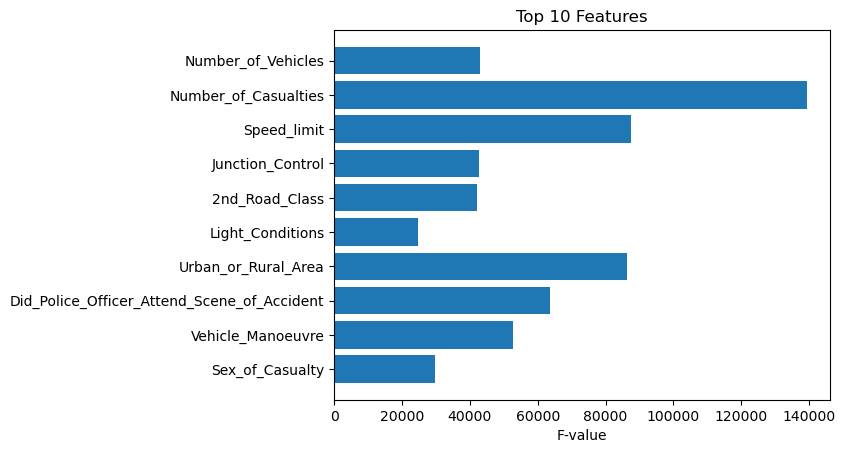

In [ ]:
X = merged_data.drop(columns=['Date','Local_Authority_(Highway)'])
y = merged_data['Accident_Severity']

from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# apply feature selection to get the top 10 features
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)

# get the indices of the top 10 features
top_indices = selector.get_support(indices=True)

# get the names and scores of the top 10 features
top_features = X.columns[top_indices].tolist()
top_scores = selector.scores_[top_indices]

# create a horizontal bar chart of the top 10 features and their scores
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
y_pos = range(len(top_features))
ax.barh(y_pos, top_scores, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('F-value')
ax.set_title('Top 10 Features')
plt.show()

In [ ]:
accidents = merged_data[top_features + ['Accident_Severity']]

In [ ]:
accidents.columns

Index(['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', 'Light_Conditions',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Vehicle_Manoeuvre', 'Sex_of_Casualty', 'Accident_Severity'],
      dtype='object')

In [ ]:
accidents = accidents[accidents!=-1].dropna()

In [ ]:
accidents.Accident_Severity.value_counts()

3    2177605
2     293813
1      25523
Name: Accident_Severity, dtype: int64

## Original Distribution

---



In [ ]:
X,y = accidents.iloc[:,:-1], accidents.iloc[:,-1]

###Logistic Regression

Logistic regression is a method for supervised learning that is used to classify things into different groups. The logistic function, which maps the output of a linear equation to a number between 0 and 1, is used to model the link between the input features and the output.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(class_weight='balanced')
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 55.33
              precision    recall  f1-score   support

           1   0.030978  0.592672  0.058878      5104
           2   0.150919  0.322176  0.205550     58763
           3   0.920610  0.584032  0.714676    435522

    accuracy                       0.553308    499389
   macro avg   0.367502  0.499627  0.326368    499389
weighted avg   0.820948  0.553308  0.648065    499389



Predicted,1,2,3,All
Actual,,,,
1,3025,1212,867,5104
2,18763,18932,21068,58763
3,75862,105301,254359,435522
All,97650,125445,276294,499389


###Decision Tree Classifier

Decision trees employ input information to create judgments or predictions using a tree-like structure. It separates the data depending on characteristics at each node, creating branches and leaf nodes that reflect the final predictions.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Split the dataset into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    accidents.iloc[:,:-1], accidents.iloc[:,-1], test_size=0.2, random_state=42,stratify=accidents.iloc[:,-1])

# Compute class weights
class_weights = {1: len(train_labels) / (3 * sum(train_labels==1)),
                 2: len(train_labels) / (3 * sum(train_labels==2)),
                 3: len(train_labels) / (3 * sum(train_labels==3))}

# Create the classifier with class weights
clf = DecisionTreeClassifier(class_weight=class_weights)

# Train the classifier
clf.fit(train_data, train_labels)

# Evaluate the classifier
predictions = clf.predict(test_data)
print(classification_report(test_labels, predictions))


              precision    recall  f1-score   support

           1       0.05      0.67      0.09      5104
           2       0.19      0.49      0.27     58763
           3       0.94      0.60      0.73    435522

    accuracy                           0.59    499389
   macro avg       0.39      0.59      0.37    499389
weighted avg       0.84      0.59      0.67    499389



###Random Forest  and Balanced Random Forest Classifier

Random forests are a way of averaging multiple deep tree structures learning on different parts of the same testing set, in order to minimize uncertainty. This comes at the risk of a small improvement in bias and some loss of interpretability.

The Balanced Random Forest classifier attempts to address this issue by modifying the training procedure. During the development of individual decision trees in the ensemble, it employs a balanced sampling technique. At each node of the decision trees, this method includes randomly under-sampling the majority class and/or over-sampling the minority class. This guarantees that each decision tree is trained on a balanced subset of the data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)

# Create a Balanced Random Forest Classifier
brfc = BalancedRandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the Random Forest Classifier on the training data
rfc.fit(X_train, y_train)

# Fit the Balanced Random Forest Classifier on the training data
brfc.fit(X_train, y_train)

# Predict using Random Forest Classifier
y_pred_rfc = rfc.predict(X_test)

# Predict using Balanced Random Forest Classifier
y_pred_brfc = brfc.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Print the accuracy score of both models
print("Random Forest Classifier Accuracy Score:", accuracy_score(y_test, y_pred_rfc))
print("Balanced Random Forest Classifier Accuracy Score:", accuracy_score(y_test, y_pred_brfc))

Random Forest Classifier Accuracy Score: 0.8789600892290379
Balanced Random Forest Classifier Accuracy Score: 0.564243505563799


In [ ]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred_rfc)
print("Accuracy", round(accuracy_score(y_pred_rfc, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred_rfc, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 87.9
              precision    recall  f1-score   support

           1   0.776515  0.160658  0.266234      5104
           2   0.690189  0.079727  0.142942     58763
           3   0.881787  0.995215  0.935074    435522

    accuracy                       0.878960    499389
   macro avg   0.782830  0.411867  0.448083    499389
weighted avg   0.858166  0.878960  0.835028    499389



Predicted,1,2,3,All
Actual,,,,
1,820,180,4104,5104
2,75,4685,54003,58763
3,161,1923,433438,435522
All,1056,6788,491545,499389


In [ ]:
# Confusion matrix for Balanced RandomForestClasifier
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred_brfc)
print("Accuracy", round(accuracy_score(y_pred_brfc, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred_brfc, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 56.42
              precision    recall  f1-score   support

           1   0.043666  0.710815  0.082277      5104
           2   0.181457  0.458077  0.259943     58763
           3   0.937573  0.576850  0.714251    435522

    accuracy                       0.564244    499389
   macro avg   0.387565  0.581914  0.352157    499389
weighted avg   0.839464  0.564244  0.654334    499389



Predicted,1,2,3,All
Actual,,,,
1,3628,1004,472,5104
2,15589,26918,16256,58763
3,63869,120422,251231,435522
All,83086,148344,267959,499389


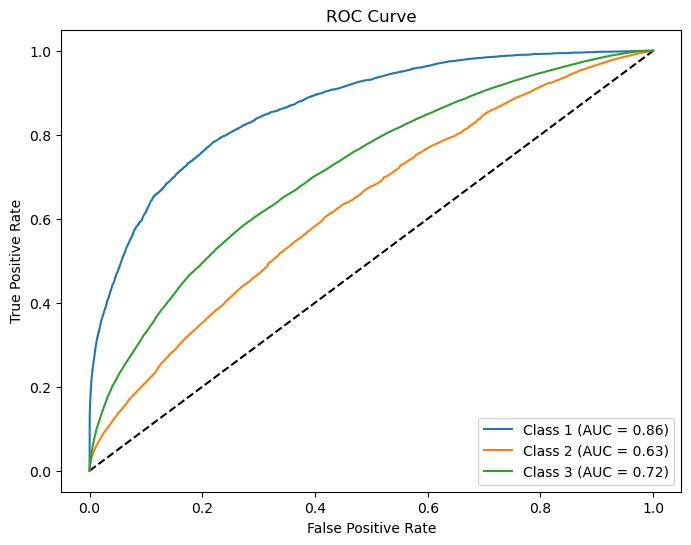

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict class probabilities
probs = brfc.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
classes = np.unique(y_train)
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test.to_numpy(), probs[:, i], pos_label=classes[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label='Class %s (AUC = %0.2f)' % (classes[i], roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Sampling Dataset into similar distribution

---



In [ ]:
acc1 = accidents[accidents['Accident_Severity']==1]
acc2 = accidents[accidents['Accident_Severity']==2].sample(30000)
acc3 = accidents[accidents['Accident_Severity']==3].sample(30000)

accidents_sample = pd.concat([acc1,acc2,acc3]).sample(len(acc1) + len(acc2) + len(acc3))
print(accidents_sample.shape)
accidents_sample.head()

(85523, 11)


,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Junction_Control,2nd_Road_Class,Light_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Manoeuvre,Sex_of_Casualty,Accident_Severity
Accident_Index,,,,,,,,,,,
200501CP00085,2,2,30,4.0,5.0,1,1,1.0,18.0,1.0,1
200501CP00085,2,2,30,4.0,5.0,1,1,1.0,18.0,1.0,1
200501CP00085,2,2,30,4.0,5.0,1,1,1.0,5.0,1.0,1
200501CP00085,2,2,30,4.0,5.0,1,1,1.0,5.0,1.0,1
200501RY10515,1,1,30,2.0,3.0,1,1,1.0,18.0,1.0,1


###Gradient Boosting Classifier

The technique continually improves its predictions by optimizing a loss function via gradient descent, culminating in a highly predictive model capable of handling complicated datasets. It is often used on bias models to reduce bias error.

In [ ]:
X,y = accidents_sample.iloc[:,:-1], accidents_sample.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = GradientBoostingClassifier(n_estimators=400, learning_rate=0.01,max_depth=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 56.1
              precision    recall  f1-score   support

           1   0.618396  0.646621  0.632194      5105
           2   0.479334  0.446500  0.462335      6000
           3   0.585303  0.602667  0.593858      6000

    accuracy                       0.561006     17105
   macro avg   0.561011  0.565263  0.562796     17105
weighted avg   0.558009  0.561006  0.559164     17105



Predicted,1,2,3,All
Actual,,,,
1,3301,1176,628,5105
2,1387,2679,1934,6000
3,650,1734,3616,6000
All,5338,5589,6178,17105


###Logistic Regression

The use of sampled data helps reduce bias toward the majority class and improves prediction accuracy for the minority class. Logistic regression on sampled data provides more trustworthy and accurate insights into accident severity, allowing for improved decision-making 

In [ ]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    y_true=y_test, 
    y_pred=y_pred)
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 50.61
              precision    recall  f1-score   support

           1       0.56      0.54      0.55      5105
           2       0.42      0.43      0.42      6000
           3       0.55      0.56      0.55      6000

    accuracy                           0.51     17105
   macro avg       0.51      0.51      0.51     17105
weighted avg       0.51      0.51      0.51     17105



Predicted,1,2,3,All
Actual,,,,
1,2737,1621,747,5105
2,1446,2564,1990,6000
3,728,1917,3355,6000
All,4911,6102,6092,17105


###Decision Tree Classifier

Training the decision tree on a smaller, more representative sample of the data can increase computing efficiency and perhaps improve the model's generalization capabilities. Based on the features gained from the sampled data, the sampled decision tree can give insights and make predictions

In [ ]:
# Create the classifier with class weights
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(classification_report(y_test, y_pred))

Accuracy 54.9
              precision    recall  f1-score   support

           1       0.60      0.67      0.63      5105
           2       0.47      0.49      0.48      6000
           3       0.59      0.51      0.55      6000

    accuracy                           0.55     17105
   macro avg       0.55      0.55      0.55     17105
weighted avg       0.55      0.55      0.55     17105



##Conclusion

---

We could conclude from the scope of this research that, compared to other models, the gradient boosting classifier had the greatest predictions for the sampled distribution, while the balanced random forest classifier had the best predictions for initially dispersed data. This demonstrates how effective machine learning models may be for predicting the severity of traffic accidents.
Based on our results, we make the following suggestions to the general public and law enforcement:

For Public:
1. Safe Driving Education: To minimize accident risk and severity, public awareness campaigns and educational activities should focus on encouraging safe driving behaviours’, particularly among young and inexperienced drivers.
2. Age-Related Driving Regulations: Young drivers should be made aware of how their age influences the severity of accidents and insurance costs. Encouraging safe driving and following traffic laws can help reduce accidents and insurance costs.

For law enforcement:
1. Targeted Traffic Enforcement: To reduce dangerous driving and accidents, law enforcement should prioritize high-accident regions for traffic enforcement and patrols.
2. Collaboration with Insurance Companies: Collaboration between law enforcement and insurance companies can lead to better risk assessment and pricing. Sharing accident statistics, driver age, and vehicle information can assist insurance firms in determining acceptable prices.
Continuously examining accident data, including driver age and vehicle information, can offer law enforcement significant insights. Identifying patterns can help guide targeted enforcement, traffic engineering techniques, and road safety legislation.

